In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from collections import Counter
from collections import defaultdict

In [16]:
dataset=pd.read_csv('nuovo_dataset_totale.csv')

In [17]:
dataset

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,[51.0]
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,[47.0]
2,56tXgHlSHCfgmGhwVXNizc,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,[44.0]
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,"[36.0, 40.0]"
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,[45.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,0wiDjWz3U1WfwXSrWHXe2b,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,"[86.0, 79.0, 50.0]"
109145,46n9OJc7LOIVdj8t2l5WA5,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,[47.0]
109146,127uq83uGFapbddqiMUKky,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,"[86.0, 79.0]"
109147,0ZdUHFxifUJNqo7G4aJzoF,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,"[47.0, 38.0]"


In [18]:
# Funzione per trasformare le stringhe in liste di float
def trasforma_in_lista(lst_str):
    # Rimuovi i caratteri '[' e ']' e splitta la stringa
    lst_str = lst_str.strip('][').split(', ')
    # Utilizza eval per valutare la lista di stringhe e convertirla in una lista di float
    return [float(x) for x in lst_str]

# Applica la funzione a ciascun valore nella colonna
dataset['popularity_artist'] = dataset['popularity_artist'].apply(trasforma_in_lista)

# Calcola la media di ciascuna lista
dataset['popularity_artist'] = round(dataset['popularity_artist'].apply(np.mean),2)


In [19]:
dataset=dataset.drop(['id'], axis=1)

In [20]:
dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,51.00
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,47.00
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,44.00
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,38.00
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,71.67
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,47.00
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,82.50
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,42.50


In [21]:
dataset['mode'].unique()

array([1, 0])

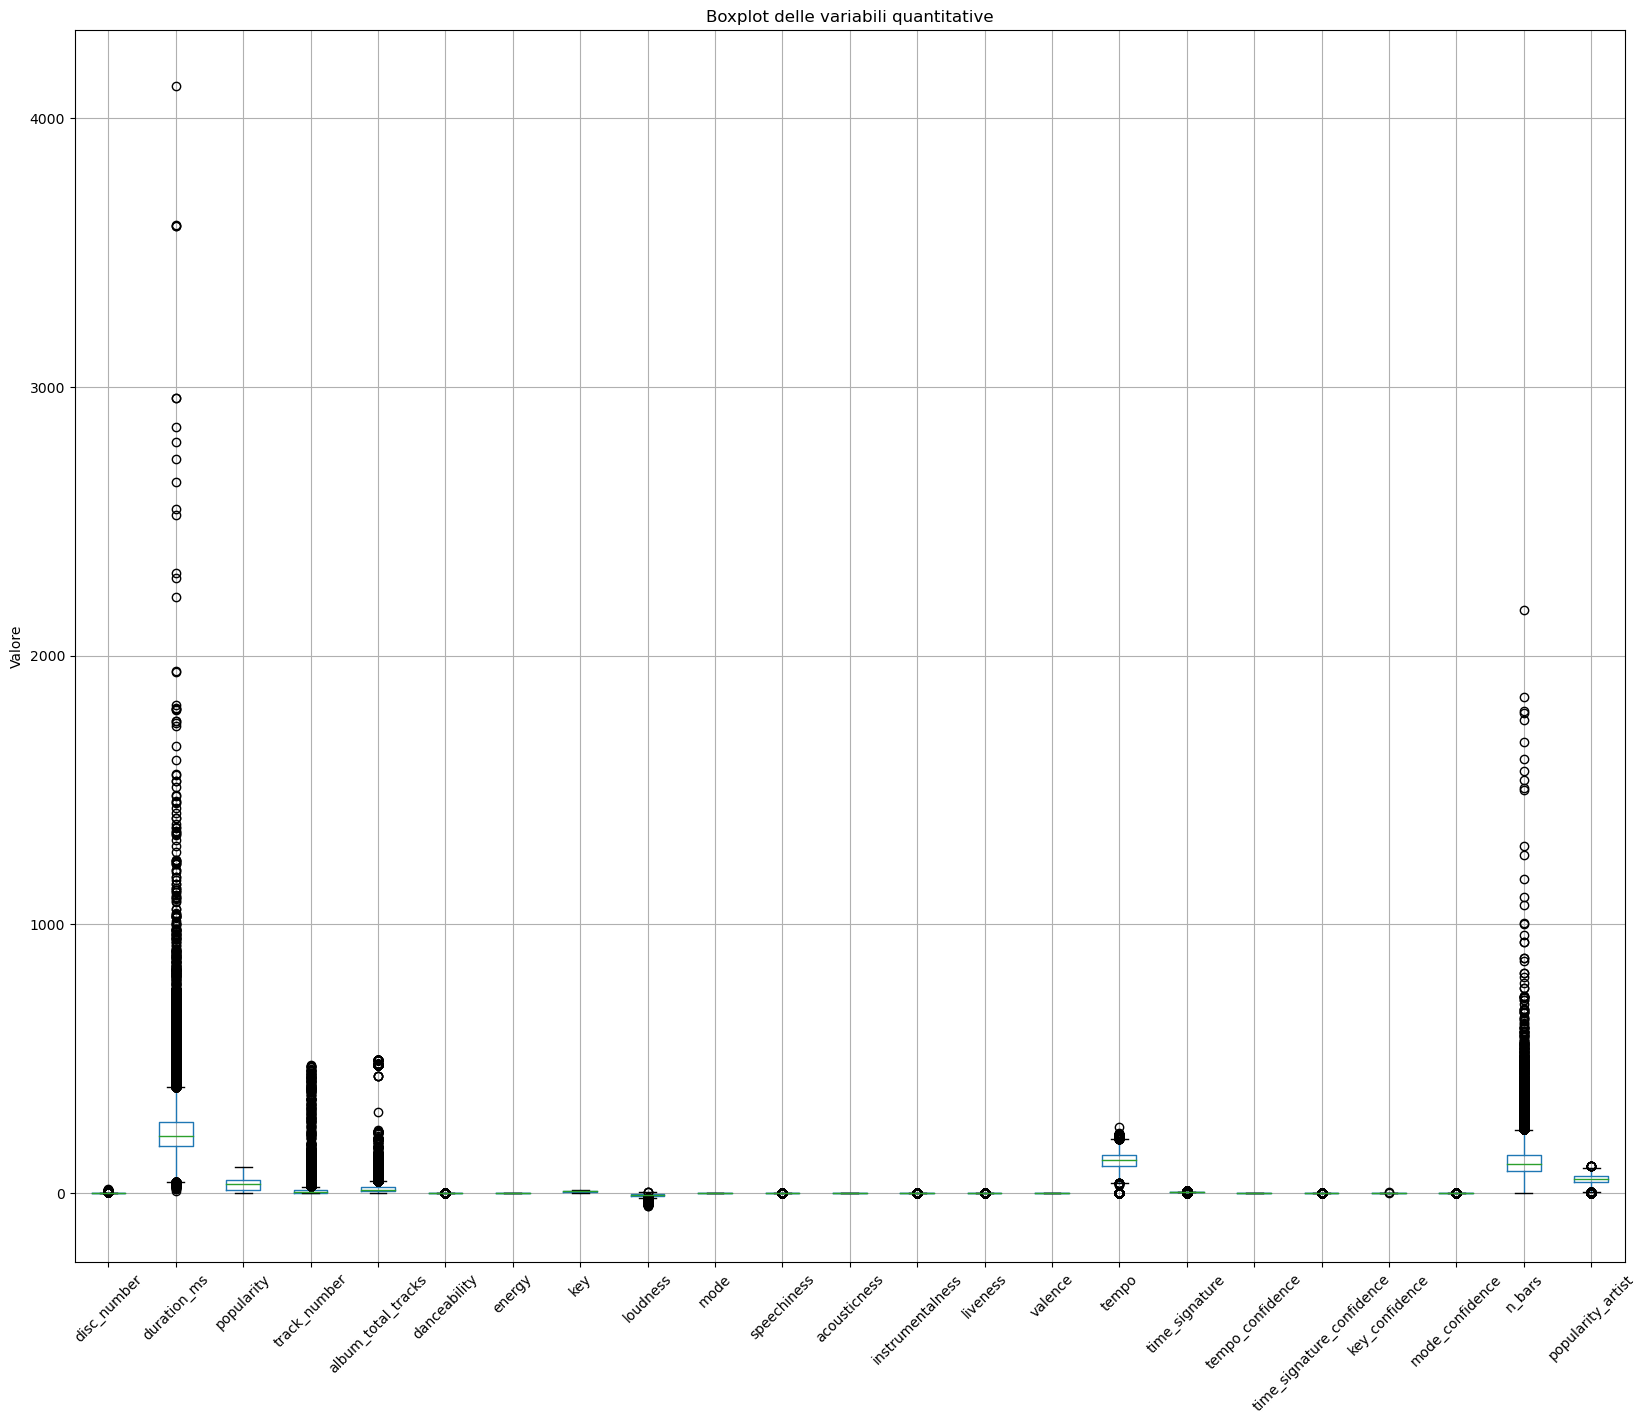

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Supponiamo che il tuo dataset sia rappresentato come un DataFrame di pandas chiamato "dataset"
# e contiene colonne sia quantitative che qualitative

# Seleziona solo le colonne contenenti dati quantitativi
dataset_quantitative = dataset.select_dtypes(include=['int', 'float'])

# Visualizza i boxplot per le colonne quantitative
plt.figure(figsize=(20, 16))
dataset_quantitative.boxplot()
plt.title('Boxplot delle variabili quantitative')
plt.ylabel('Valore')
plt.xticks(rotation=45)  # Ruota le etichette sull'asse x per maggiore leggibilità
plt.show()


In [23]:
X=dataset.drop([ 'name', 'explicit', 'mode', 'artists', 'album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'mode_confidence', 'genre'], axis=1)

In [24]:
X_2=dataset.drop([ 'name', 'explicit', 'mode', 'artists', 'album_type', 'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'album_name', 'mode_confidence', 'genre'], axis=1)

In [25]:
X_2.columns

Index(['disc_number', 'duration_ms', 'popularity', 'track_number',
       'danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'n_bars', 'popularity_artist'],
      dtype='object')

## Normalizzazione

In [26]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

## LOF

In [27]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming your dataframe is called X

silhouette_scores = []
k_values = range(1, 50)

for k in k_values:
    # Create LOF model
    lof = LocalOutlierFactor(n_neighbors=k)

    # Print the current value of k being tested
    print("Testing with k =", k)

    # Fit model and predict labels
    labels = lof.fit_predict(X)

    # Calculate silhouette score
    silhouette = silhouette_score(X, labels)
    silhouette_scores.append(silhouette)

# Find the best k value
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Plot the elbow curve
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Silhouette Score')
plt.title('Elbow Curve for Local Outlier Factor')
plt.grid(True)
plt.show()

print("Best k value:", best_k)


Testing with k = 1


KeyboardInterrupt: 

In [28]:
clf = LocalOutlierFactor(n_neighbors=34) # , novelty=True
y_pred_lof = clf.fit_predict(X)
np.unique(y_pred_lof, return_counts=True)

(array([-1,  1]), array([   493, 108656]))

In [29]:
lof_outliers_indices = np.where(y_pred_lof == -1)[0]

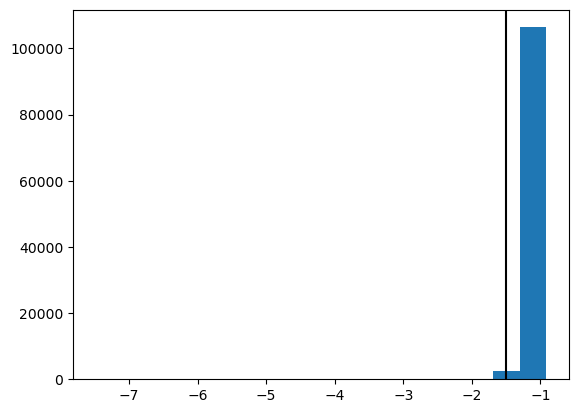

In [30]:
plt.hist(clf.negative_outlier_factor_, bins=17) # bins log2n+1 using 100k
plt.axvline(np.min(clf.negative_outlier_factor_[np.where(y_pred_lof==1)]), c='k')
plt.show()

In [ ]:
np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
Xa = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(Xa), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=3, contamination=0.01)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(Xa)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(Xa[:, 0], Xa[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xa[:, 0], Xa[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
# Set marker sizes for legend
for handle in legend.legendHandles:
    handle.set_sizes([10])
plt.show()


In [31]:
dataset['duration_ms']

0         290.48
1         539.23
2         264.20
3         387.41
4         248.96
           ...  
109144    209.66
109145    205.72
109146    195.85
109147    208.70
109148    202.83
Name: duration_ms, Length: 109149, dtype: float64

## HBOS

In [32]:
from pyod.models.hbos import HBOS

In [33]:
clf = HBOS()
clf.fit(X)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [35]:
outliers_hbos = clf.predict(X)
np.unique(outliers_hbos, return_counts=True)

(array([0, 1]), array([98234, 10915]))

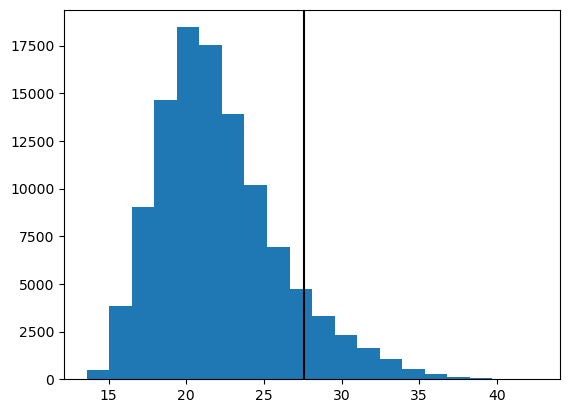

In [36]:
plt.hist(clf.decision_scores_, bins=20)
plt.axvline(np.min(clf.decision_scores_[np.where(outliers_hbos==1)]), c='k')
plt.show()

In [37]:
hbos_outliers_indices = np.where(outliers_hbos == 1)[0]

## DEPTH BASED

In [41]:
from sklearn.covariance import EllipticEnvelope

In [42]:
ellenv = EllipticEnvelope(random_state=0)
ellenv.fit(X)

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.493119628250696 > -97.769480785361097). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.897604501613799 > -98.788228139586437). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.835419811650922 > -99.662916565496730). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.892020005101379 > -97.041025203333348). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.225636289695551 > -84.728366259629908). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.131529129811256 > -97.941380753419992). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-30.055439215742350 > -201.797969023767763). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.145444631095003 > -99.148116625936112). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.283356792649812 > -97.451925244064199). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.630242889940561 > -97.339493179312598). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-98.135571205969669 > -202.843263945481368). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.318271975320783 > -99.029408109568706). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.401019907233220 > -97.853574656011403). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.471769778203054 > -200.578838044508927). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-25.962207395111985 > -200.832089028556652). You may want to try with a higher value of 

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.854463325927568 > -98.685024383555316). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.921351829834336 > -201.764050084099324). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.569432147162331 > -98.990056735605279). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.339003081603295 > -94.762909030953438). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-25.832560123091994 > -94.632064384125130). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.473883273149795 > -94.565892288165827). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.175700528095476 > -201.061258142273715). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.502417740484631 > -98.569135774229295). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.249668126396458 > -98.226267471729543). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.961464407267570 > -96.774515509494975). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.005536469016164 > -96.307791683938021). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.311542298786236 > -96.911632714957648). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.340485394320723 > -97.016784771129394). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.832236935664341 > -97.393592133804759). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-26.578453179103757 > -200.319237465692396). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.181367118190295 > -97.665073579778166). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.103392086172846 > -96.653668928204567). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.189942378457928 > -96.859460085381741). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.798348746095641 > -95.758573276627445). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-26.332261879441816 > -95.975969247304391). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.818937633184802 > -96.600237164823355). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.268971259705665 > -97.173363296980881). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.242149860164005 > -98.285477127885088). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.299090118678848 > -97.911290188398226). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.253584630831455 > -98.228981985754885). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.198988123196088 > -97.933296864091275). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.353856977856324 > -98.092831879881174). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-98.806368644144953 > -100.389142634318574). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.844465564666137 > -96.247221441414752). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.148122004951119 > -95.648697737968504). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.354553438722320 > -97.273748944741698). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.361086495018924 > -97.122661861029201). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.785139058314840 > -96.603619620515289). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.415213280052683 > -98.450951974612892). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.564013212758269 > -97.879356441525431). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.998386883398339 > -96.967250004255376). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.496463234244089 > -96.828805578302379). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.696936394745208 > -97.457149877420647). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.692433449942030 > -95.929279399643377). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-25.296149395557936 > -97.013244495762265). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-25.314144167418860 > -96.922994748557386). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.254949889437356 > -96.432521820720439). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-99.756270295125191 > -100.077008771529123). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.118473950963391 > -82.691752035704468). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.697380413208663 > -97.225524150858121). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-96.123995086225705 > -98.458742725568953). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.701590522807322 > -97.585912110605676). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-26.319769839087517 > -203.158772081928845). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.261435974047473 > -97.816701259965143). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.210055167322793 > -97.569517038228895). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.243502876421928 > -97.017511397066187). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.651694145996174 > -96.267263746054297). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.515516450246437 > -96.200561417082966). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.161615267433632 > -96.090084241661373). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.169151676718485 > -97.060856963565271). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.433476614287329 > -96.426928595433125). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.489191632699658 > -95.758926031684098). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.791750205881740 > -96.573762423270921). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-23.623160451939075 > -84.055673620157719). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-97.207035963925861 > -97.729914475616070). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.946179067589910 > -97.298810637926621). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.683097173534392 > -96.328673285641528). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-24.284028310938020 > -80.179914645880970). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.360949070069182 > -97.031944982648113). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.525045166246414 > -96.802813987261743). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.555267348793819 > -96.689305855801962). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.250531472393035 > -95.971383449705343). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.191009921185469 > -94.307286043097605). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.510450889436555 > -96.717413708702296). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.649592094371158 > -97.415263174380868). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.398890344972202 > -97.077094094966611). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.524232812604581 > -97.871946193550414). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.414396397373373 > -200.035302234733024). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.511545119294041 > -94.872231088884917). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.797766413920144 > -94.982975444978067). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-27.236387710652270 > -197.004859403013370). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.685438262996598 > -95.582360051062622). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.192971854853468 > -96.640205297814475). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.341102167499741 > -96.584357789537776). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.995166751214512 > -96.470901922974789). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.449755120475487 > -90.676411455669736). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.842664703237745 > -94.315403773989473). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.009275332154587 > -95.545696859799193). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.879208500002704 > -94.375260913626448). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.579554431031891 > -91.086721573759576). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.398364721051678 > -94.462528455780273). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.462386052224190 > -94.509426630707836). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.442715359420788 > -96.970322113575492). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.759280987979039 > -96.158271777265398). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.104271590814207 > -95.697416735266017). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.751138001765639 > -98.018195173223432). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.819249467563708 > -98.217536911217294). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.629039200814674 > -98.102755574849454). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.547092956996536 > -97.045838927241476). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.803420559067703 > -96.298754736563055). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.635731070725384 > -97.085230639210096). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.482727449260707 > -96.801148016034972). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.346801555385369 > -96.595052111562680). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.354737093805014 > -96.590461108458157). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.552892107743162 > -95.954183346273638). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.711103221567200 > -96.061135914640062). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.496723520065387 > -96.784809394750454). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.295915929517534 > -95.056335978558593). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.357623060023002 > -94.909068903225005). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.324441070314890 > -94.885910920243418). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.498277728939797 > -96.837944342754739). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.914090105530917 > -97.201156234228691). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.719734227753079 > -96.438283032382387). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.669554157888385 > -94.089221826153192). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.570745078544078 > -95.115636609026780). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.681722179532443 > -94.167139712882260). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.255284167209624 > -94.091153180577692). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.087475455542560 > -95.088287819872903). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.591773669465297 > -96.001790822929635). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.043239676079679 > -96.455119631580402). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.985296948199732 > -96.366328694345654). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.191790623354635 > -96.700133821952335). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.397715412018300 > -198.662306361384879). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.437740574880184 > -200.535852943380434). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.087817912837099 > -197.681818424681950). You may want to try with a higher value of

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.052831043052564 > -94.238643685596145). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.764302031223750 > -93.728253240505069). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.730334137876469 > -94.808406494924398). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.711595624200925 > -97.135398511204031). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-30.756566743813980 > -92.083664906375191). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.134312076485287 > -95.504628810229363). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.335174935458539 > -95.563335418836672). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.785997630868295 > -96.014223501762942). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.354753917403116 > -96.808503911796123). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.366762342203984 > -95.723619111812411). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-27.985688948296477 > -197.822341379333892). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.977625527528204 > -96.352803275511604). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.053340944427504 > -95.588118050416654). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.181730099517367 > -95.559347017572549). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.616344874059322 > -95.071880709987568). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.187579660620099 > -198.540672417049677). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.178668773822494 > -95.758611291752018). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.273743337333514 > -95.752388853898751). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.186904146750152 > -95.643812163483133). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.376048646586668 > -96.886339876002467). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.011377032597295 > -96.476112477035088). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.407534154673897 > -97.615835976816271). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.106651458957302 > -97.320956041830641). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.281112502597253 > -97.518660220051032). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.743495862738357 > -96.124118915440278). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.571943420412182 > -95.781242376073720). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.563531449864712 > -94.507318140448049). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.514157681639134 > -95.439929217082152). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.781420204074308 > -94.680337152685127). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.035055245699013 > -94.821140924727203). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.368793569802662 > -95.864748916967216). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.994369665829865 > -96.546139965799810). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.769980328943817 > -95.406097026270430). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.754182294976182 > -197.295960393192871). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.577057510889915 > -95.945545441943892). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.233187462589271 > -95.127313507831090). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.846687499849864 > -95.846593940861624). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.741174858825161 > -95.740161754008597). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.314643110880354 > -96.234933966426041). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.101184852681406 > -90.271329638792011). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.987284670411711 > -94.521097470631233). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.789954542147058 > -94.510772351122810). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.523543683230969 > -96.093646616074551). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.792519317584379 > -96.381172330559650). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.610436777033755 > -96.930818605154442). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.294653921765367 > -198.237157789917234). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.898808592455779 > -97.436615102898401). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.864977911105527 > -97.434863101096838). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.558832466879139 > -95.114600620569732). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.725676425205378 > -95.245673649802214). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.023346610460379 > -96.484340620433372). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.156849738512591 > -96.632245302977111). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.182201996694531 > -96.713126509875011). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.005146294329837 > -198.638799459462035). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.280221614866292 > -95.439943135848964). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.265731554680059 > -95.409977083524623). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.643791304365195 > -95.664205599731105). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.592072262218949 > -94.609095022324638). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.990729536148990 > -96.389972620363622). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.001686693314738 > -96.484505172630776). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.891911913266483 > -97.283753916733957). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.314297979587977 > -96.778330808173209). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.237085523001141 > -95.777757982795620). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.436343600585587 > -95.856081017884648). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.044191571994034 > -96.665734108178228). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.583664949627135 > -95.388871170409473). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-27.768434211077047 > -198.495293496326411). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.820765148619159 > -95.044671681931931). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.808672849949900 > -95.444605049000927). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.994215254827736 > -96.369017518117445). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.868670111900812 > -96.302761878861929). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.002390065427733 > -96.420263386822285). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-30.970129580650731 > -92.273662982166755). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-30.856269090616788 > -92.196818695120697). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.118621126365738 > -94.010235574259767). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.609626334977733 > -96.901273640430617). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.801053692763574 > -96.214777633290126). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-26.547206053226180 > -194.709468367452786). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.002118100677961 > -96.534526559296964). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.143831987490870 > -96.183119095826612). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.067990259583084 > -96.292984626793270). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.251186005167618 > -197.428060008578171). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.366643274057594 > -95.778910928252827). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.000410945437679 > -96.599264701794056). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.529505217471581 > -95.401057732151230). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.162015107985582 > -94.479716790534823). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.325526615082353 > -94.367087579079538). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.851733239342167 > -96.209943038752144). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.799192738970561 > -95.362544295116194). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.020104731770914 > -96.554439538092836). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.699557328557276 > -95.754860419828418). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.079074124918762 > -95.175184240746034). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.389639142605446 > -95.114383367265035). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.554728615971058 > -96.436554634475883). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.969218296454429 > -95.679674925690932). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.420902352512854 > -96.660241913639240). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.694254228029223 > -94.369124213799552). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.274589100393442 > -95.741970277288502). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.857593959143045 > -95.047323399472020). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.321583769328797 > -95.669710687665642). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.118653662589761 > -91.837454344706714). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.069730983571691 > -91.596294853531873). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.918359147158270 > -96.344566816249738). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.907156536907763 > -96.337229107603733). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.214145116020088 > -91.785756789230604). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.424124278410346 > -95.878378729222149). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.394776996266216 > -95.861479548061993). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.202564634841920 > -91.447171218652301). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.145547043426362 > -95.601124471131996). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.366226982129547 > -95.717277946990521). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.224282993027529 > -95.752798838286850). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.091833185075359 > -94.135840082150040). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.781717176722495 > -94.805104027412952). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.594044895405958 > -96.038355875747030). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.887962499450566 > -96.319776999786271). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.585027894400838 > -96.895603648813903). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.038066773416901 > -96.582083565152843). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.082487294485958 > -96.625216045719881). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.524547883147534 > -95.947823608968960). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.056666786405302 > -96.625546404401049). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.883513929744311 > -96.372396874285982). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.997593096964607 > -96.468713152285943). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.849758791758831 > -96.352372915066411). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.428934589307843 > -96.766337973708517). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.230199484897611 > -95.712422480903314). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.290299364261230 > -96.770841750539944). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.905388338055388 > -97.577484509720421). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.008260233597639 > -97.069046899520856). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.165834439439578 > -96.336510861840509). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.596269336258857 > -97.899525288240028). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.624275153336711 > -96.977711584169072). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-30.301394855625858 > -91.702349186453219). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.023346610460379 > -96.450559729997522). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.425753383865398 > -95.815781221363366). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.040369011838806 > -96.600365617698571). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.556000924084358 > -96.846409254915500). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.640401816552895 > -97.908624528009383). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-30.498742348336233 > -92.070407963171618). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.175380086560835 > -96.233583007986795). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.109471380707703 > -96.139237131750690). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.090387896467362 > -98.398754262951996). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.852890615914390 > -96.302620682811337). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.941511134784363 > -96.429614981801734). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.415588439590167 > -96.846600452723962). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.811024632796617 > -94.939639741760118). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.811362784278927 > -94.715957941643353). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.403587052455222 > -95.275093783832716). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.028679914974237 > -198.635278316944380). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-28.202469369565595 > -196.378196544355433). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-27.004105327677024 > -195.457805453189280). You may want to try with a higher value of

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.119000014929156 > -94.612580844981593). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.754504188518723 > -95.272997112592051). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.136840071329885 > -94.296467289457951). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.391794278350844 > -96.785599532425522). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.522577264168490 > -96.920775644718560). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.458118894215673 > -98.362413643663842). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.543653908255422 > -96.846437667180950). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-95.281112502597253 > -97.517315427431868). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.727705083088708 > -97.069938921663365). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.916661388024792 > -96.302203807711919). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.455786081398344 > -96.805970733994258). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.009558594191773 > -96.491987738981493). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-93.149677527908537 > -95.717020243903860). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.823516541472571 > -95.497260033436362). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.585447649124859 > -95.129827719805562). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-94.588397642867292 > -96.892180329488568). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-92.778288873063360 > -95.017277140646470). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-29.468997942459517 > -200.904945542629150). You may want to try with a higher value of s

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.530758578524399 > -94.411712352332728). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-90.596904377604162 > -94.509476368551915). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-91.087497997236184 > -94.563169878185306). You may want to try with a higher value of su

/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-85.154493895790722 > -89.557642523857041). You may want to try with a higher value of support_fraction (current value: 0.500).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-84.265933298537306 > -88.675565655687819). You may want to try with a higher value of support_fraction (current value: 0.500).
  warnings.warn(
/Users/isabelsantucci/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-84.024802734122318 > -88.474206513450014). You may want to try with a higher value of su

EllipticEnvelope(random_state=0)

In [43]:
# predict returns 1 for an inlier and -1 for an outlier
outliers_ev = ellenv.predict(X)

In [44]:
outliers_ev

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
np.unique(outliers_ev, return_counts=True)

(array([-1,  1]), array([10915, 98234]))

In [48]:
ev_outliers_indices = np.where(outliers_ev == -1)[0]

## Isolation Forest

In [38]:
from pyod.models.iforest import IsolationForest
from sklearn.model_selection import train_test_split

In [39]:
X

array([[-0.09415954,  0.64232054,  0.88877568, ...,  0.04720442,
         1.96030306,  0.02807558],
       [-0.09415954,  3.19269435,  0.58344744, ..., -0.31689677,
         2.54684748, -0.1969029 ],
       [-0.09415954,  0.37287803,  0.32173751, ...,  1.66543194,
         0.90452311, -0.36563675],
       ...,
       [-0.09415954, -0.32789805,  2.11008865, ..., -1.5710231 ,
        -0.18477366,  1.79978106],
       [-0.09415954, -0.1961501 ,  1.23772224, ...,  0.24948286,
        -0.46966667, -0.45000368],
       [-0.09415954, -0.25633379,  1.10686728, ...,  1.4631535 ,
        -0.70428443,  1.15296795]])

In [40]:
clf = IsolationForest()
clf.fit(X)

IsolationForest()

In [41]:
outliers_if = clf.predict(X)
np.unique(outliers_if, return_counts=True)

(array([-1,  1]), array([11783, 97366]))

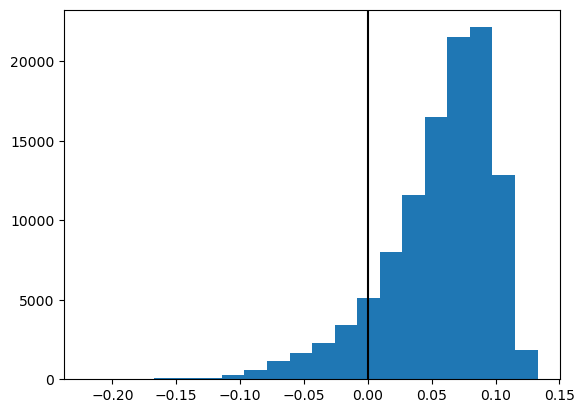

In [42]:
plt.hist(clf.decision_function(X), bins=20)
plt.axvline(np.min(clf.decision_function(X)[np.where(outliers_if==1)]), c='k')
plt.show()

In [43]:
isolation_forest_outliers_indices = np.where( outliers_if== -1)[0]

## Eliminazione outliers

In [44]:
lof_outliers_indices.shape

(493,)

In [45]:
hbos_outliers_indices.shape

(10915,)

In [46]:
isolation_forest_outliers_indices.shape

(11783,)

In [51]:
dataset

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,51.00
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,47.00
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,44.00
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,38.00
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,71.67
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,47.00
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,82.50
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,42.50


In [48]:
import numpy as np

# Funzione per trovare gli outlier comuni tra le tre liste di outlier
def find_common_outliers(outliers_lof, hbos_outliers_indices, outliers_isolation_forest):
    common_outliers = set(outliers_lof) & set(hbos_outliers_indices) & set(outliers_isolation_forest)
    return list(common_outliers)

def remove_common_outliers(data, common_outliers):
    cleaned_data = data.drop(common_outliers)
    return cleaned_data



# Trova gli outlier comuni tra le tre liste
common_outliers = find_common_outliers(lof_outliers_indices,hbos_outliers_indices, isolation_forest_outliers_indices)

cleaned_data = remove_common_outliers(dataset, common_outliers)



In [49]:
len(common_outliers)

123

In [50]:
cleaned_data

,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,album_release_date,...,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_bars,genre,popularity_artist
0,Grey,1.0,290.48,False,52.0,5.0,Kölsch,album,1989,2017-09-22,...,0.24,186.00,3.0,0.02,1.00,0.50,0.52,234.0,minimal-techno,51.00
1,Thrown,1.0,539.23,False,45.0,5.0,Kiasmos,album,Kiasmos,2014-10-27,...,0.14,120.02,4.0,0.68,0.33,0.41,0.59,269.0,minimal-techno,47.00
2,Routine,1.0,264.20,False,39.0,5.0,Joris Delacroix,album,Night Visions,2018-06-22,...,0.32,118.05,3.0,0.85,0.46,0.90,0.76,171.0,minimal-techno,44.00
3,Confronted - Anfisa Letyago Stranger Remix,1.0,387.41,False,0.0,6.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,...,0.04,128.99,4.0,0.88,0.50,0.51,0.50,207.0,minimal-techno,38.00
4,Jupiter Sunrise,1.0,248.96,False,0.0,1.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,...,0.12,120.00,4.0,0.88,1.00,0.47,0.46,123.0,minimal-techno,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109144,I'm Good (Blue) - REAPER Extended Remix,1.0,209.66,True,23.0,2.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,...,0.37,173.96,4.0,0.73,1.00,0.09,0.18,145.0,edm,71.67
109145,End Of The Night,1.0,205.72,True,56.0,1.0,Danny Avila,single,End Of The Night,2018-11-16,...,0.31,99.97,4.0,0.71,1.00,0.40,0.54,84.0,edm,47.00
109146,Sexy Bitch (feat. Akon),1.0,195.85,True,80.0,3.0,David Guetta;Akon,album,One More Love,2010-11-22,...,0.80,130.01,4.0,0.81,0.99,0.10,0.33,106.0,edm,82.50
109147,Savannah,1.0,208.70,False,60.0,1.0,Diviners;Philly K.,single,Savannah,2015-11-25,...,0.39,108.07,4.0,0.65,1.00,0.55,0.60,89.0,edm,42.50


In [51]:
cleaned_data.columns

Index(['name', 'disc_number', 'duration_ms', 'explicit', 'popularity',
       'track_number', 'artists', 'album_type', 'album_name',
       'album_release_date', 'album_release_date_precision',
       'album_total_tracks', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'tempo_confidence',
       'time_signature_confidence', 'key_confidence', 'mode_confidence',
       'n_bars', 'genre', 'popularity_artist'],
      dtype='object')

In [52]:
cleaned_data.to_csv('dataset_senza_outliers_f.csv', index=False)